In [1]:
from sympy import symbols, cos
from sympy.physics.mechanics import *
init_vprinting(use_latex='mathjax', pretty_print=True)
from IPython.display import display

In [2]:
n = 5

In [3]:
q = dynamicsymbols('q:' + str(n))  # Generalized coordinates
u = dynamicsymbols('u:' + str(n))  # Generalized speeds
f = dynamicsymbols('f:' + str(n))                # Force applied to the cart
w = dynamicsymbols('q:' + str(n), 1)
m = symbols('m:' + str(n))         # Mass of each bob
l = symbols('l:' + str(n))             # Length of each link
g, t = symbols('g t')                  

In [4]:
I = ReferenceFrame('I')  
P0 = Point('P0')                    # Hinge point of top link   
P0.set_vel(I, 0)                    # Set the velocity of P0

In [5]:
RF0 = I.orientnew('RF0', 'Axis', [q[0], I.z])
RF0.set_ang_vel(I, u[0] * I.z)
Pcm0 = P0.locatenew('Pcm0', l[0]/2 * RF0.x)
Pcm0.v2pt_theory(P0, I, RF0)
Pa0 = Particle('Pa0', Pcm0, m[0])
I0 = inertia(RF0, m[0] * l[0] * l[0] / 3,  m[0] * l[0] * l[0] / 3 ,m[0] * l[0] * l[0] / 3)
RB0 = RigidBody('RB0', Pcm0, RF0, m[0], (I0, P0))

RF1 = I.orientnew('RF1', 'Axis', [q[1], I.z])
RF1.set_ang_vel(I, (u[1] + u[0]) * I.z)
P1 = P0.locatenew('P1', l[0] * RF0.x)
Pcm1 = P1.locatenew('Pcm1', l[1]/2 * RF1.x)
Pcm1.v2pt_theory(P1, I, RF1)
Pa1 = Particle('Pa1', Pcm1, m[1])
I1 = inertia(RF1, m[1] * l[1] * l[1] / 3,  m[1] * l[1] * l[1] / 3 ,m[1] * l[1] * l[1] / 3)
RB1 = RigidBody('RB1', Pcm1, RF1, m[1], (I1, P1))

RF2 = I.orientnew('RF2', 'Axis', [q[2], I.z])
RF2.set_ang_vel(I, (u[2] + u[1] + u[0]) * I.z)
P2 = P1.locatenew('P2', l[1] * RF1.x)
Pcm2 = P2.locatenew('Pcm2', l[2]/2 * RF2.x)
Pcm2.v2pt_theory(P2, I, RF2)
Pa2 = Particle('Pa2', Pcm2, m[2])
I2 = inertia(RF2, m[2] * l[2] * l[2] / 3,  m[2] * l[2] * l[2] / 3 ,m[2] * l[2] * l[2] / 3)
RB2 = RigidBody('RB2', Pcm2, RF2, m[2], (I2, P2))

RF3 = I.orientnew('RF3', 'Axis', [q[3], I.z])
RF3.set_ang_vel(I, (u[3]+ u[2] + u[1] + u[0]) * I.z)
P3 = P2.locatenew('P3', l[2] * RF2.x)
Pcm3 = P3.locatenew('Pcm3', l[3]/2 * RF3.x)
Pcm3.v2pt_theory(P3, I, RF3)
Pa3 = Particle('Pa3', Pcm3, m[3])
I3 = inertia(RF3, m[3] * l[3] * l[3] / 3,  m[3] * l[3] * l[3] / 3 ,m[3] * l[3] * l[3] / 3)
RB3 = RigidBody('RB3', Pcm3, RF3, m[3], (I3, P3))

RF4 = I.orientnew('RF4', 'Axis', [q[4], I.z])
RF4.set_ang_vel(I, (u[4] + u[3] + u[2] + u[1] + u[0]) * I.z)
P4 = P3.locatenew('P4', l[3] * RF3.x)
Pcm4 = P4.locatenew('Pcm4', l[4]/2 * RF4.x)
Pcm4.v2pt_theory(P4, I, RF4)
Pa4 = Particle('Pa4', Pcm4, m[4])
I4 = inertia(RF4, m[4] * l[4] * l[4] / 3,  m[4] * l[4] * l[4] / 3 ,m[4] * l[4] * l[4] / 3)
RB4 = RigidBody('RB4', Pcm4, RF4, m[4], (I4, P4))

# frames = [I, RF0, RF1]
# points = [Pcm0, Pcm1]
# particles = [RB0, RB1]

# forces = [(Pcm0, - m[0]*g*I.y), (RF0, f[0]*l[0]/2*RF0.z), (Pcm1, - m[1]*g*I.y), (RF1, f[1]*l[1]/2*RF1.z)]
# kindiffs = [w[0] - u[0], w[1] - u[1]]

frames = [I, RF0, RF1, RF2, RF3, RF4]
points = [Pcm0, Pcm1, Pcm2, Pcm3, Pcm4]
particles = [RB0, RB1, RB2, RB3, RB4]
forces = [(Pcm0, - m[0]*g*I.y), (RF0, f[0]*cos(q[0])*l[0]/2*RF0.z),
          (Pcm4, - m[3]*g*I.y), (RF4, f[4]*cos(q[4])*l[4]/2*RF4.z)]
kindiffs = [q[0].diff(t) - u[0], q[1].diff(t) - u[1],
            q[2].diff(t) - u[2], q[3].diff(t) - u[3],
            q[4].diff(t) - u[4]]

In [6]:
kane = KanesMethod(I, q_ind=q, u_ind=u, kd_eqs=kindiffs) # Initialize the object
fr, frstar = kane.kanes_equations(particles, loads=forces)
# frstar.simplify()
# fr.simplify()

In [7]:
from sympy import Dummy, lambdify
from numpy import array, hstack, zeros, linspace, pi, ones
from numpy.linalg import solve
from scipy.integrate import odeint

In [8]:
bob_mass = 1                         # The maximum mass of the bobs is 10 grams
parameters = [g]                       # Parameter definitions starting with gravity and the first bob
parameter_vals = [9.81, 0.4, 1, 0.4, 1, 0.6, 1, 0.4, 1, 0.4, 1]            # Numerical values for the first two
for i in range(n):                           # Then each mass and length
    parameters += [l[i], m[i]]

In [9]:
import numba
dynamic = q + u + f                                             # Add the input force
dummy_symbols = [Dummy() for i in dynamic]                     # Create a dummy symbol for each variable
dummy_dict = dict(zip(dynamic, dummy_symbols))
kindiff_dict = kane.kindiffdict()                              # Get the solved kinematical differential equations
M = kane.mass_matrix_full.subs(kindiff_dict).subs(dummy_dict)  # Substitute into the mass matrix 
F = kane.forcing_full.subs(kindiff_dict).subs(dummy_dict)      # Substitute into the forcing vector
# M.simplify()
# F.simplify()
M_func = lambdify(dummy_symbols + parameters, M)               # Create a callable function to evaluate the mass matrix 
F_func = lambdify(dummy_symbols + parameters, F)               # Create a callable function to evaluate the forcing vector

In [10]:
def right_hand_side(x, t, args):
    """Returns the derivatives of the states.

    Parameters
    ----------
    x : ndarray, shape(2 * (n + 1))
        The current state vector.
    t : float
        The current time.
    args : ndarray
        The constants.

    Returns
    -------
    dx : ndarray, shape(2 * (n + 1))
        The derivative of the state.
    
    """
    u = [2,0,0,0,0]
    arguments = hstack((x, u, args))     # States, input, and parameters
    dx = array(solve(M_func(*arguments), # Solving for the derivatives
        F_func(*arguments))).T[0]
    return dx

In [11]:
import time
from numba import jit

In [12]:
start = time.time()
x0 = hstack(([pi/2, pi/2, pi/2, -pi/4, pi/4], [0, 0, 0, 0, 0])) # Initial conditions, q and u
t = linspace(0, 3, 90)                 # Time vector
y = odeint(right_hand_side, x0, t, args=(parameter_vals,))
end = time.time()
end - start

6.55615496635437

In [13]:
from numpy import zeros, cos, sin, arange, around
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle, Circle

In [14]:
def animate_pendulum(t, states, lengths, filename=None):
    """Animates the n-pendulum and optionally saves it to file.

    Parameters
    ----------
    t : ndarray, shape(m)
        Time array.
    states: ndarray, shape(m,p)
        State time history.
    length: float
        The length of the pendulum links.
    filename: string or None, optional
        If true a movie file will be saved of the animation. This may take some time.

    Returns
    -------
    fig : matplotlib.Figure
        The figure.
    anim : matplotlib.FuncAnimation
        The animation.

    """
    # the number of pendulum bobs
    numpoints = int(states.shape[1] / 2 + 1)
    # first set up the figure, the axis, and the plot elements we want to animate
    fig = plt.figure()

    # set the limits based on the motion
    xmin = around(states[:, 0].min(), 1)
    xmax = around(states[:, 0].max(), 1)

    # create the axes
    ax = plt.axes(xlim=(-0.5, 1), ylim=(-0.1, 2), aspect='equal')

    # display the current time
    time_text = ax.text(0.04, 0.9, '', transform=ax.transAxes)

    # blank line for the pendulum
    line, = ax.plot([], [], lw=2, marker='o', markersize=3, color='red')
    line_head,= ax.plot([], [], lw=2, marker=None, color='red')

    rect = Rectangle([-0.025,-0.25],
        0.15, 0.05, fill=True, color='red', ec='red')
    ax.add_patch(rect)
    circle = Circle((0.0, 1.6), radius=0.1, color='red')
    ax.add_patch(circle)
    # initialization function: plot the background of each frame
    def init():
        time_text.set_text('')
        line.set_data([], [])
        line_head.set_data([], [])
        rect.set_xy((-0.025, -0.025))
        circle.center = (0, 1.6)
        return time_text, line, line_head, rect, circle
    # animation function: update the objects
    
    def animate(i):
        time_text.set_text('t = {:2.2f}'.format(t[i]))
        x = [0]
        y = [0]
        for j in arange(1, numpoints):
            x.append(x[j-1] + lengths[j-1]* cos(states[i, j-1]))
            y.append(y[j-1] + lengths[j-1] * sin(states[i, j-1]))         
        
        x_head = [x[3], x[3] + 0.25*cos(states[i, 2])]
        y_head = [y[3], y[3] + 0.25*sin(states[i, 2])]
        circle.center = (x[3] + 0.25*cos(states[i, 2]),y[3] + 0.25*sin(states[i, 2]))
        line.set_data(x, y)
        line_head.set_data(x_head, y_head)
        return time_text, line, line_head, rect, circle

    # call the animator function
    anim = animation.FuncAnimation(fig, animate, frames=len(t), init_func=init,
            interval=t[-1] / len(t) * 1000, blit=True, repeat=False)

    # save the animation if a filename is given
    if filename is not None:
        anim.save(filename, fps=30, codec='libx264')

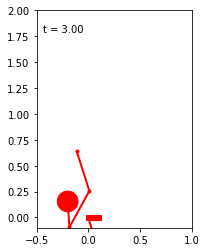

In [15]:
animate_pendulum(t, y, [0.4, 0.4, 0.6, 0.4, 0.4], filename="/home/mans/Documents/open-loop.avi")
#animate_pendulum(t, y, arm_length, filename="/home/mans/Documents/open-loop.mp4")

In [16]:
from IPython.display import HTML, Video

HTML("""
<video width="640" height="640" controls loop autoplay>
  <source src="/home/mans/Documents/open-loop.mp4" type="video/mp4">
</video>
""")

In [17]:
frstar.simplify()

In [18]:
fr.simplify()

In [19]:
dynamic = q + u + f                                             # Add the input force
dummy_symbols = [Dummy() for i in dynamic]                     # Create a dummy symbol for each variable
dummy_dict = dict(zip(dynamic, dummy_symbols))
kindiff_dict = kane.kindiffdict()                              # Get the solved kinematical differential equations
M = kane.mass_matrix_full.subs(kindiff_dict).subs(dummy_dict)  # Substitute into the mass matrix 
F = kane.forcing_full.subs(kindiff_dict).subs(dummy_dict)

In [20]:
M.simplify()

In [21]:
F.simplify()

In [22]:
M_func = lambdify(dummy_symbols + parameters, M)               # Create a callable function to evaluate the mass matrix 
F_func = lambdify(dummy_symbols + parameters, F)               # Create a callable function to evaluate the forcing vector

In [23]:

def right_hand_side(x, t, args):
    """Returns the derivatives of the states.

    Parameters
    ----------
    x : ndarray, shape(2 * (n + 1))
        The current state vector.
    t : float
        The current time.
    args : ndarray
        The constants.

    Returns
    -------
    dx : ndarray, shape(2 * (n + 1))
        The derivative of the state.
    
    """
    u = [2,0,0,0,0]
    arguments = hstack((x, u, args))     # States, input, and parameters
    dx = array(solve(M_func(*arguments), # Solving for the derivatives
        F_func(*arguments))).T[0]
    return dx

In [24]:
import time
start = time.time()
x0 = hstack(([pi/2, pi/2, pi/2, -pi/4, pi/4], [0, 0, 0, 0, 0])) # Initial conditions, q and u
t = linspace(0, 5, 150)                 # Time vector
y = numba.jit(odeint(right_hand_side, x0, t, args=(parameter_vals,)))
end = time.time()
end - start

TypeError: The decorated object is not a function (got type <class 'numpy.ndarray'>).